# Model Evaluation and Improvement(モデルの評価と改善)

教師あり学習と教師なし学習の基本について説明し、さまざまな機械学習アルゴリズムを検討したので、モデルの評価とパラメーターの選択についてさらに詳しく説明します。  

教師なし学習でモデルを評価および選択することは、多くの場合、非常に定性的なプロセスであるため、教師あり方法、回帰、および分類に焦点を当てます（第4章で見たように）。  

教師付きモデルを評価するために、これまでのところ、 train_test_split関数を使用してデータセットをトレーニングセットとテストセットに分割し、fitメソッドを呼び出してトレーニングセット上でモデルを構築し、scoreメソッドを使用してテストセット上で評価しています。  
以下にその処理の例を示します。

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 合成データセットを作成する
X, y = make_blobs(random_state=0)

# データとラベルをトレーニングセットとテストセットに分割します
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# モデルをインスタンス化し、トレーニングセットに適合させます
logreg = LogisticRegression().fit(X_train, y_train)

# テストセットでモデルを評価する
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


データをトレーニングセットとテストセットに分割する理由は、モデルが新しい、以前は見られなかったデータにどれだけうまく一般化されるかを測定することに関心があるためです。  
モデルがトレーニングセットにどの程度適合しているかではなく、トレーニング中に観察されなかったデータをどれだけうまく予測できるかに関心があります。  

この章では、この評価の2つの側面について詳しく説明します。  
最初に、一般化パフォーマンスを評価するためのより堅牢な方法である交差検定を紹介し、スコア法によって提供されるデフォルトの精度と$R^2$の測定値を超える分類と回帰のパフォーマンスを評価する方法について説明します。

## Cross-Validation(交差検証)

Ceoss Validationは、トレーニングセットとテストセットへの分割を使用するよりも安定して徹底的な一般化パフォーマンスを評価する統計的方法です。  
Cross Validarionでは、代わりにデータが繰り返し分割され、複数のモデルがトレーニングされます。  
Cross Validationの最も一般的に使用されるバージョンは、k-fold cross-validation(k-分割交差検定)です。  
ここで、kはユーザー指定の数値で、通常は5または10です。5分割交差検定を実行する場合、データは最初に（の5つの部分に分割されます。ほぼ）同じサイズで、折り目(folds)と呼ばれます。  
次に、一連のモデルがトレーニングされます。  
最初のモデルは、最初のfoldsをテストセットとして使用してトレーニングされ、残りのfolds（2〜5）がトレーニングセットとして使用されます。  
モデルは、folds 2〜5のデータを使用して作成され、folds 1で精度が評価されます。  
次に、別のモデルが作成されます。  
今回は、folds 2をテストセットとして使用し、folds 1、3、4、および5のデータをトレーニングセットとして使用します。  
このプロセスは、folds 3、4、および5をテストセットとして使用して繰り返されます。  
トレーニングセットとテストセットへのデータのこれら5つの分割のそれぞれについて、精度を計算します。  
最終的に、5つの精度値を収集しました。  
このプロセスを図5-1に示します。

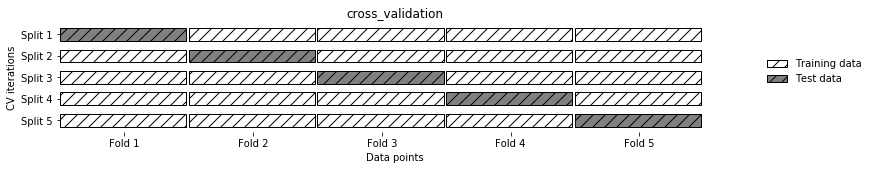

In [2]:
import mglearn
mglearn.plots.plot_cross_validation()

**Figure 5-1. Data splitting in five-fold cross-validation**

通常、データの最初の5分の1は最初のfoldであり、データの2番目の5分の1は2番目のfoldです。

### Cross-Validation in scikit-learn(scikit-learnでの相互検証)

Cross-varidationは、model_selectionモジュールのcross_val_score関数を使用してscikit-learnに実装されます。  
cross_val_score関数のパラメーターは、評価するモデル、トレーニングデータ、およびground truth lavbel(正解ラベル)です。  
アイリスデータセットでロジスティック回帰を評価してみましょう。

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


デフォルトでは、cross_val_scoreは3分割交差検定を実行し、3つの精度値を返します。  
cvパラメーターを変更することで、使用するfolds(折り畳み)数を変更できます。

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Cross Varidation(交差検定)の精度を要約する一般的な方法は、平均を計算することです。

In [5]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


平均交差検定を使用すると、モデルは平均で約97％正確であると予想できます。  
five-fold cross validation(5分割交差検定)によって生成された5つのスコアすべてを見ると、100％の精度から90％の精度の範囲で、フォールド間の精度に比較的高い分散があると結論付けることもできます。  
これは、モデルがトレーニングに使用される特定のfolds(折り畳み)に大きく依存していることを意味している可能性がありますが、データセットのサイズが小さいことの結果である可能性もあります。

In [6]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.05663562, 0.06259131, 0.03517008, 0.04140806, 0.03553486]),
 'score_time': array([0.00054264, 0.00047803, 0.00043559, 0.00047803, 0.00048876]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

fit_time  score_time  test_score  train_score
0  0.056636    0.000543    0.966667     0.966667
1  0.062591    0.000478    1.000000     0.966667
2  0.035170    0.000436    0.933333     0.983333
3  0.041408    0.000478    0.966667     0.983333
4  0.035535    0.000489    1.000000     0.975000

Mean times and scores:
 fit_time       0.046268
score_time     0.000485
test_score     0.973333
train_score    0.975000
dtype: float64


### Benefits of Cross-Validation(交差検証の利点)

トレーニングセットとテストセットへの単一の分割の代わりに相互検証を使用することには、いくつかの利点があります。  
まず、train_test_splitがデータのランダム分割を実行することを忘れないでください。  
データをランダムに分割するときに「lucky」であり、分類が難しいすべての例がトレーニングセットに含まれることを想像してみてください。  
その場合、テストセットには「easy(簡単な)」例のみが含まれ、テストセットの精度は非現実的に高くなります。  
逆に、「unlucky(運が悪い)」場合は、分類が難しいすべての例をランダムにテストセットに入れて、非現実的に低いスコアを取得した可能性があります。  

ただし、交差検定を使用する場合、各例はトレーニングセットに1回だけ含まれます。  
各例は1つのフォールドにあり、各フォールドは1回のテストセットです。  
したがって、すべての交差検定スコア（およびそれらの平均）を高くするには、モデルをデータセット内のすべてのサンプルに適切に一般化する必要があります。  

データを複数分割することで、トレーニングデータセットの選択に対してモデルがどれほど敏感であるかについての情報も得られます。  
アイリスデータセットの場合、90％から100％の精度が見られました。  
これはかなりの範囲であり、新しいデータに適用したときにモデルが最悪のシナリオと最良のシナリオでどのように機能するかについてのアイデアを提供します。  

データの単一分割を使用する場合と比較した場合の相互検証のもう1つの利点は、データをより効果的に使用できることです。  
train_test_splitを使用する場合、通常、データの75％をトレーニングに使用し、データの25％を評価に使用します。  
five-fold cross validationを使用する場合、各反復で、データの5分の4（80％）を使用してモデルを適合させることができます。  
10-fold cross validationを使用する場合、データの10分の9（90％）を使用してモデルを適合させることができます。  
通常、データが多いほど、モデルはより正確になります。  

Cross-validationの主な欠点は、計算コストの増加です。  
現在、単一モデルではなくkモデルをトレーニングしているため、cross-varidationは、データの単一分割を実行するよりも約k倍遅くなります。  

> cross-validationは、新しいデータに適用できるモデルを構築する方法ではないことに留意することが重要です。  
cross-varidationはモデルを返しません。  
cross_val_scoreを呼び出すと、複数のモデルが内部で構築されますが、cross-validationの目的は、特定のデータセットでトレーニングされたときに特定のアルゴリズムがどの程度一般化されるかを評価することだけです。

### Stratified k-Fold Cross-Validation and Other Strategies(層化k分割交差検定およびその他の戦略)

前のセクションで説明したように、データの最初の1k分の1の部分から始めて、データセットをk倍に分割することは、必ずしも良い考えではない場合があります。  
たとえば、アイリスデータセットを見てみましょう。

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


ご覧のとおり、データの最初の3分の1はクラス0、2番目の3分の1はクラス1、最後の3分の1はクラス2です。  
このデータセットで3分割交差検定を行うことを想像してみてください。  
最初のフォールドはクラス0のみであるため、データの最初の分割では、テストセットはクラス0のみであり、トレーニングセットはクラス1と2のみです。  
トレーニングセットとテストセットのクラスは3つの分割すべてで異なるため、このデータセットでは3分割交差検定の精度はゼロになります。  
アイリスの精度は0％よりもはるかに優れているため、
これはあまり役に立ちません。  

こでは単純なk-fold戦略が失敗するため、scikit-learnはそれを分類に使用せず、層化されたk-fold相互検証を使用します。  
層化交差検定(stratified k-fold cross-validation)では、図5-2に示すように、クラス間の比率がデータセット全体と同じになるようにデータを分割します。

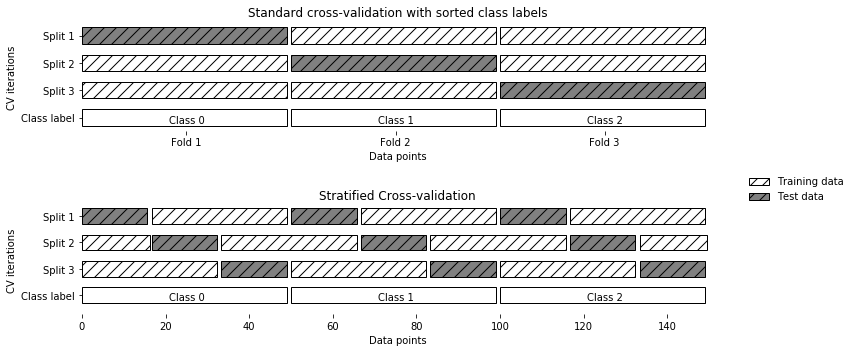

In [9]:
mglearn.plots.plot_stratified_cross_validation()

**Figure 5-2. Comparison of standard cross-validation and stratified cross-validation
when the data is ordered by class label**

例えば、サンプルの90%がクラスAに属し、サンプルの10%がクラスBに属する場合、層化されたクロスバリデーションは、各フォールドにおいて、サンプルの90%がクラスAに属し、サンプルの10%がクラスBに属することを保証します。  

分類器を評価するために，k-fold cross-validationの代わりにstratified k-fold cross-varidationを使用することは，通常，一般化性能のより信頼性の高い推定値が得られるので，良いアイデアである。  
クラスBに属するサンプルの10%だけの場合，標準のk-fold cross-validationを使用すると，1つのフォールドがクラスAのサンプルだけを含むことが簡単に起こるかもしれない。  

回帰の場合、scikit-learnはデフォルトで標準のk-fold cross-validationを使用します。  回帰ターゲットが持つさまざまな値を各フォールドが表すようにすることも可能ですが、これは一般的に使用される戦略ではなく、ほとんどのユーザーにとって驚くべきことです。

#### More control over cross-validation(交差検証のより詳細な制御)

cvパラメーターを使用してcross_val_scoreで使用されるフォールドの数を調整できることは前に説明しました。  
ただし、scikit-learnでは、cvパラメーターとしてcross-validationスプリッターを提供することにより、データの分割中に何が発生するかをより細かく制御できます。  
ほとんどのユースケースでは、回帰のk-fold cross-varidationと分類のstratified k-fold cross-validationのデフォルトが適切に機能しますが、別の戦略を使用したい場合もあります。  
たとえば、分類データセットで標準のk-fold cross-validationを使用して、他の誰かの結果を再現したいとします。  
これを行うには、最初にmodel_selectionモジュールからKFoldスプリッタークラスをインポートし、使用するフォールド数でインスタンス化する必要があります。

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

次に、kfoldスプリッターオブジェクトをcvパラメーターとしてcross_val_scoreに渡すことができます。

In [11]:
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


このようにして、irisデータセットで3分割（非層化）交差検定を使用することは本当に悪い考えであることを確認できます。

In [12]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


覚えておいてください：各フォールドはアイリスデータセットのクラスの1つに対応しているため、何も学習できません。  
この問題を解決する別の方法は、折り目を階層化する代わりにデータをシャッフルして、ラベルによるサンプルの順序を削除することです。  
これを行うには、KFoldのシャッフルパラメーターをTrueに設定します。  
データをシャッフルする場合は、再現性のあるシャッフルを取得するために、random_stateも修正する必要があります。  
そうしないと、cross_val_scoreを実行するたびに、異なる分割が使用されるため、異なる結果が生成されます（これは問題ではないかもしれませんが、驚くべきことです）。  
分割する前にデータをシャッフルすると、はるかに良い結果が得られます。

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


#### Leave-one-out cross-validation

もう1つの頻繁に使用される交差検定方法は、leave-one-outです。  
Leave-one-out cross-validationは、各分割が1つのサンプルであるk-fold cross-varidationと考えることができます。  
分割ごとに、テストセットとなる単一のデータポイントを選択します。
これは、特に大きなデータセットの場合、非常に時間がかかる可能性がありますが、小さなデータセットでより良い推定値を提供する場合があります。

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### Shuffle-split cross-validation

クロスバリデーションのためのもう一つの非常に柔軟な戦略は、shuffle-split cross-validationです。  
shuffle-split cross-validationでは、各分割は、テストセットのために多くのポイントをtrain_sizeでサンプリングし、テストセットのために多くの（不連続な）ポイントをtest_sizeでサンプリングします。  
この分割は n_iter 回繰り返されます。  
図5-3は，10点からなるデータセットを、5点の学習セットと2点のテストセットに分割することを4回繰り返している様子を示しています（train_sizeとtest_sizeには整数を使用して、これらのセットの絶対サイズを使用したり、浮動小数点数を使用して、データセット全体の端数を使用したりすることができます）。

In [15]:
mglearn.plots.plot_shuffle_split()

**Figure 5-3. ShuffleSplit with 10 points, train_size=5, test_size=2, and n_iter=4**

次のコードは、データセットを10回の反復で50％のトレーニングセットと50％のテストセットに分割します。

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.97333333 0.94666667 0.98666667 0.96       0.94666667 0.96
 0.97333333 0.94666667 0.96       0.94666667]


shuffle-split cross-validationを使用すると、トレーニングとテストのサイズに関係なく反復回数を制御できます。  
これは、役立つ場合があります。  
また、合計が1にならないtrain_sizeとtest_sizeの設定を提供することにより、各反復でデータの一部のみを使用することもできます。  
この方法でデータをサブサンプリングすると、大規模なデータセットを試すのに役立ちます。  

また、ShuffleSplit の階層化されたバリアントがあり、適切な名前は StratifiedShuffleSplit であり、分類タスクに対してより信頼性の高い結果を提供できます。

#### Cross-validation with groups

cross-validationのもう1つの非常に一般的な設定は、データ内に関連性の高いグループがある場合です。  
顔の写真から感情を認識するシステムを構築し、100人の写真のデータセットを収集して、各人が複数回キャプチャされ、さまざまな感情を示しているとします。  
目標は、データセットにない人々の感情を正しく識別できる分類器を構築することです。  
ここでは、デフォルトのstratified cross-validationを使用して、分類器のパフォーマンスを測定できます。  
ただし、同じ人物の写真がトレーニングセットとテストセットの両方に含まれる可能性があります。  
完全に新しい顔と比較して、分類器がトレーニングセットの一部である顔の感情を検出するのははるかに簡単です。  
したがって、新しい顔への一般化を正確に評価するには、トレーニングセットとテストセットにさまざまな人物の画像が含まれていることを確認する必要があります。  

これを実現するために、GroupKFoldを使用できます。これは、グループの配列を引数として取り、画像内の人物を示すために使用できます。  
ここでのgroups配列は、トレーニングセットとテストセットを作成するときに分割してはならないデータ内のグループを示し、クラスラベルと混同しないでください。  

データ内のグループのこの例は、同じ患者からの複数のサンプルがある可能性があるが、新しい患者への一般化に関心がある医療アプリケーションでは一般的です。  
同様に、音声認識では、データセットに同じ話者の複数の録音がある場合がありますが、新しい話者の音声を認識することに関心があります。  

以下は、groups配列で指定されたグループ化を使用した合成データセットの使用例です。  
データセットは12個のデータポイントで構成され、データポイントごとに、グループはポイントが属するグループ（患者を考える）を指定します。  
グループは、4つのグループがあり、最初の3つのサンプルが最初のグループに属し、次の4つのサンプルが2番目のグループに属することを指定します。

In [17]:
from sklearn.model_selection import GroupKFold

# 合成データセットを作成する
X, y = make_blobs(n_samples=12,random_state=0)

# 最初の3つのサンプルが同じグループに属していると仮定します。
# 次に次の4つなど
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


サンプルをグループごとに注文する必要はありません。  
これは、説明のために行っただけです。  
これらのラベルに基づいて計算された分割は、図5-4に視覚化されています。  

ご覧のとおり、分割ごとに、各グループは完全にトレーニングセットに含まれるか、完全にテストセットに含まれます。

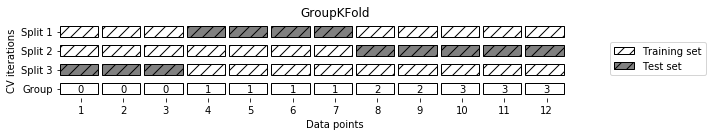

In [18]:
mglearn.plots.plot_group_kfold()

**Figure 5-4. Label-dependent splitting with GroupKFold**

scikit-learnには、cross-validationのためのより多くの分割戦略(splitting stratgies)があり、さらに多様なユースケースが可能になります（これらはscikit-learnユーザーガイドにあります）。  
ただし、標準のKFold、StratifiedKFold、およびGroupKFoldが最も一般的に使用されています。

### Grid Search

モデルがどの程度一般化されているかを評価する方法がわかったので、次のステップに進み、パラメーターを調整することでモデルの一般化パフォーマンスを向上させることができます。  
scikit-learnの多くのアルゴリズムのパラメーター設定については第2章と第3章で説明しました。パラメーターを調整する前に、パラメーターの意味を理解することが重要です。  
モデルの重要なパラメーター（最高の一般化パフォーマンスを提供するパラメーター）の値を見つけるのは難しい作業ですが、ほとんどすべてのモデルとデータセットに必要です。  
これは非常に一般的なタスクであるため、scikit-learnには標準的な方法があります。  
最も一般的に使用される方法はグリッド検索です。これは基本的に、対象のパラメーターのすべての可能な組み合わせを試すことを意味します。  

SVCクラスに実装されている、RBF（動径基底関数）カーネルを備えたカーネルSVMの場合を考えてみます。  
第2章で説明したように、カーネル帯域幅のガンマと正則化パラメーターのCの2つの重要なパラメーターがあります。  
パラメータCに0.001、0.01、0.1、1、10、100の値を試し、ガンマにも同じ値を試したいとします。  
試してみたいCとガンマの6つの異なる設定があるため、合計36のパラメーターの組み合わせがあります。  
考えられるすべての組み合わせを見ると、次に示すように、SVMのパラメーター設定のテーブル（またはグリッド）が作成されます。

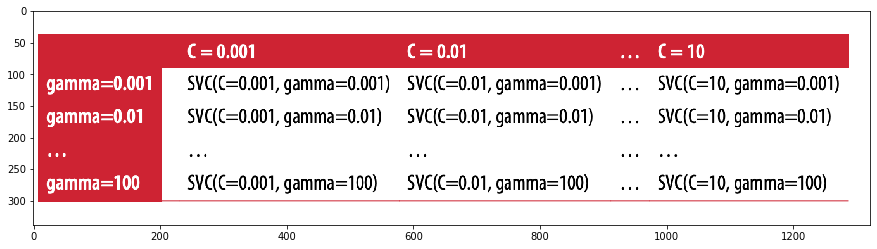

In [19]:
import matplotlib.pyplot as plt
file_name = "images/gamma_c.png"
mc = plt.imread(file_name)
plt.figure(figsize=(15, 8))
plt.imshow(mc)

### Simple Grid Search

2つのパラメーターのループと同じように、単純なグリッド検索を実装して、各組み合わせの分類器をトレーニングおよび評価できます。

In [20]:
# ナイーブグリッド検索の実装
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}  size of test set: {}".format(
    X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # パラメータの組み合わせごとに、SVCをトレーニングします
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # テストセットでSVCを評価する
        score = svm.score(X_test, y_test)
        # より良いスコアが得られた場合は、スコアとパラメーターを保存します
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112  size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### The Danger of Overfitting the Parameters and the Validation Set
**パラメータと検証セットを過剰適合させる危険性**

この結果を考えると、データセットで97％の精度で実行されるモデルを見つけたと報告したくなるかもしれません。  
ただし、次の理由により、この主張は過度に楽観的（または単に間違っている）である可能性があります。  
さまざまなパラメータを試し、テストセットで最も精度の高いものを選択しましたが、この精度が必ずしも新しいデータに引き継がれるとは限りません。  
テストデータを使用してパラメーターを調整したため、モデルの品質を評価するためにテストデータを使用することはできなくなりました。  
これは、最初にデータをトレーニングセットとテストセットに分割する必要があったのと同じ理由です。評価するには、モデルの作成に使用されなかった独立したデータセットが必要です。  

この問題を解決する1つの方法は、データを再度分割することです。  
したがって、モデルを構築するためのトレーニングセット、モデルのパラメーターを選択するための検証（または開発）セット、およびパフォーマンスを評価するためのテストセットの3つのセットがあります。  
選択したパラメータの。  
図5-5は、これがどのように見えるかを示しています。

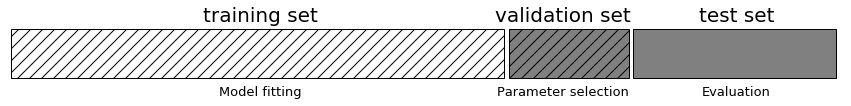

In [21]:
mglearn.plots.plot_threefold_split()

**Figure 5-5. A threefold split of data into training set, validation set, and test set**

検証(validation)セットを使用して最適なパラメーターを選択した後、見つかったパラメーター設定を使用してモデルを再構築できますが、トレーニングデータと検証(validation)データの両方でトレーニングを行います。  
このようにして、モデルを構築するために可能な限り多くのデータを使用できます。これにより、次の実装が行われます。

In [22]:
from sklearn.svm import SVC
# データをtrain + validationセットとtestセットに分割します
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# トレイン+検証セットをトレーニングセットと検証セットに分割します
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}  size of validation set: {}  size of test set:"
     " {}\n".format(X_train.shape[0], X_trainval.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # パラメータの組み合わせごとに、SVCをトレーニングします
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # テストセットでSVCを評価する
        score = svm.score(X_valid, y_valid)
        # より良いスコアが得られた場合は、スコアとパラメーターを保存します
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# トレーニングと検証を組み合わせたセットでモデルを再構築し、
# テストセットで評価します
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best patameters: {:.2f}".format(test_score))

Size of training set: 84  size of validation set: 112  size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best patameters: 0.92


検証セットの最高スコアは96％です。  
これは、モデルのトレーニングに使用したデータが少なかったためと思われます（データセットを2回分割したため、X_trainは小さくなりました）。  
ただし、テストセットのスコア（一般化の程度を実際に示すスコア）はさらに低く、92％です。  
したがって、新しいデータを正しく分類できるのは92％のみであり、以前考えていた97％ではありません。  

トレーニングセット、検証セット、テストセットの違いは、実際に機械学習手法を適用する上で基本的に重要です。  
テストセットの精度に基づいて行われた選択は、テストセットからモデルへの「leak(リーク)」情報です。 
したがって、最終評価にのみ使用される個別のテストセットを保持することが重要です。  
トレーニングと検証セットの組み合わせを使用してすべての探索的分析(exploratory analysis)とモデル選択を行い、最終評価のためにテストセットを予約することをお勧めします。  
これは、探索的視覚化(exploratory visualization)にも当てはまります。  
厳密に言えば、テストセットで複数のモデルを評価し、2つのうちの良い方を選択すると、モデルの正確さを楽観的に見積もることができます。

### Grid Search with Cross-Validation
**交差検証によるグリッド検索**

データをトレーニング、検証、および今見たテストセットに分割する方法は実行可能であり、比較的一般的に使用されていますが、データがどの程度正確に分割されるかに非常に敏感です。  
先ほどのコードスニペットの出力から，GridSearchCVが'C'. 10, 'γ': 0.001 が最適なパラメータとして選択されているのに対し，前のセクションのコードの出力では，'C'. 100, 'γ'：0.001 を最高のパラメータとして提供します。  
一般化のパフォーマンスをより正確に推定するために、トレーニングと検証セットへの単一の分割を使用する代わりに、相互検証を使用して各パラメーターの組み合わせのパフォーマンスを評価できます。  
このメソッドは、次のようにコーディングできます。

In [23]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # パラメータの組み合わせごとに、SVCをトレーニングする
        svm = SVC(gamma=gamma, C=C)
        # 相互検証を実行します
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 平均交差検定精度(cross-vslidation accuracy)を計算する
        score = np.mean(scores)
        # より良いスコアが得られた場合は、スコアとパラメーターを保存します
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# トレーニングと検証を組み合わせたセットでモデルを再構築します
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

5分割交差検定を使用してCとガンマの特定の設定を使用してSVMの精度を評価するには、36 * 5 = 180モデルをトレーニングする必要があります。  
ご想像のとおり、相互検証を使用することの主な欠点は、これらすべてのモデルのトレーニングにかかる時間です。  

次の視覚化（図5-6）は、前のコードで最適なパラメーター設定がどのように選択されるかを示しています。

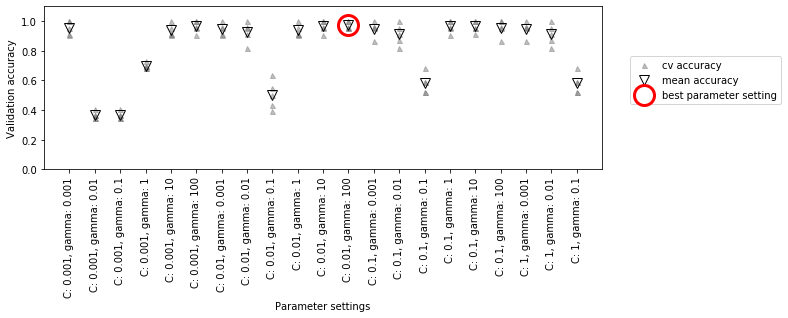

In [24]:
mglearn.plots.plot_cross_val_selection()

**Figure 5-6. Results of grid search with cross-validation**

各パラメータ設定（サブセットのみが示されています）について、相互検証の分割ごとに1つずつ、5つの精度値が計算されます。  
次に、各パラメーター設定の平均検証精度が計算されます。  
平均検証精度が最も高いパラメータが選択され、円でマークされています。  

> 先に述べたように、相互検証は特定のデータセットで特定のアルゴリズムを評価する方法です。  
ただし、グリッド検索などのパラメータ検索方法と組み合わせて使用されることがよくあります。  
このため、多くの人がクロスバリデーションという用語を口語的に使用して、クロスバリデーションを使用したグリッド検索を指します。

データを分割し、グリッド検索を実行し、最終的なパラメータを評価する全体的なプロセスを図5-7に示します。

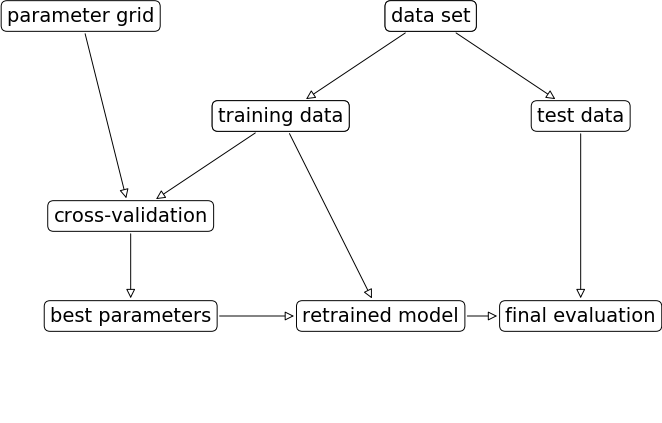

In [25]:
mglearn.plots.plot_grid_search_overview()

**Figure 5-7. Overview of the process of parameter selection and model evaluation with
GridSearchCV**

相互検証を使用したグリッド検索は、パラメーターを調整するために一般的に使用される方法であるため、scikit-learnはGridSearchCVクラスを提供し、推定器(estimator)の形式で実装します。  
GridSearchCVクラスを使用するには、最初に辞書を使用して検索するパラメーターを指定する必要があります。  
その後、GridSearchCVは必要なすべてのモデル適合を実行します。  
辞書のキーは調整したいパラメーターの名前（モデルを構築するときに与えられたもの、この場合はCとガンマ）であり、値は試してみたいパラメーター設定です。  
Cとガンマの値0.001、0.01、0.1、1、10、および100を試すと、次の辞書に変換されます。

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


これで、モデル（SVC）、検索するパラメーターグリッド（param_grid）、および使用する相互検証戦略-cross validation strategy-（たとえば、5分割層化相互検証-five fold stratifield cross validation-）を使用してGridSearchCVクラスをインスタンス化できます。

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

GridSearchCVは、以前に使用したトレーニングと検証のセットへの分割の代わりに、相互検証を使用します。  
ただし、パラメーターの過剰適合を回避するために、データをトレーニングセットとテストセットに分割する必要があります。

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

作成したgrid_searchオブジェクトは、分類子のように動作します。標準メソッドを適合、予測、およびスコアリングと呼ぶことができます$^1$。  
ただし、fitを呼び出すと、param_gridで指定したパラメーターの組み合わせごとに相互検証が実行されます。  

> 1: 別の推定量を使用して作成されたscikit-learn推定量は、メタ推定量(meta-estimator)と呼ばれます。 GridSearchCVは最も一般的に使用されるメタ推定器ですが、後で詳しく説明します。

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCVオブジェクトをフィッティングすると、最適なパラメーターが検索されるだけでなく、トレーニングデータセット全体に、最高の交差検定パフォーマンスが得られたパラメーターを使用して新しいモデルが自動的にフィッティングされます。  
したがって、fitで発生することは、このセクションの冒頭で見たIn[22]コードの結果と同等です。  
GridSearchCVクラスは、predictメソッドとscoreメソッドを使用して再トレーニングされたモデルにアクセスするための非常に便利なインターフェイスを提供します。  
最適なパラメーターがどの程度一般化されているかを評価するために、テストセットのスコアを呼び出すことができます。

In [30]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


相互検証を使用してパラメーターを選択すると、実際にテストセットで97％の精度を達成するモデルが見つかりました。  
ここで重要なことは、パラメーターの選択にテストセットを使用しなかったことです。  
見つかったパラメータはbest_params_属性でスコア化され、最高のクロスバリデーション精度（このパラメータ設定のための異なるスプリットでの平均精度）がbest_score_に格納されます。

In [31]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


> 繰り返しになりますが、best_score_を、テストセットのスコア法によって計算されたモデルの一般化パフォーマンスと混同しないように注意してください。  
スコア法を使用する（または予測法の出力を評価する）には、トレーニングセット全体でトレーニングされたモデルが使用されます。  
best_score_属性は、トレーニングセットで実行された相互検証を使用して、平均相互検証精度(mean cross-validation accuracy)を格納します。

見つかった実際のモデルにアクセスできると便利な場合があります。  
たとえば、係数(coefficients)や機能の重要性を確認する場合などです。  
best_estimator_属性を使用して、トレーニングセット全体でトレーニングされた最適なパラメーターを使用してモデルにアクセスできます。

In [32]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


grid_search自体に予測メソッドとスコアリングメソッドがあるため、予測を行ったりモデルを評価したりするためにbest_estimator_を使用する必要はありません。

#### Analyzing the result of cross-validation(交差検証の結果の分析)

モデルの一般化が検索しているパラメーターにどのように依存するかを理解するために、交差検定の結果を視覚化すると役立つことがよくあります。　　
グリッド検索は実行するのに非常に計算コストがかかるため、比較的粗くて小さいグリッドから始めることをお勧めします。　　
次に、相互検証されたグリッド検索の結果を検査し、場合によっては検索を拡張できます。　　
グリッド検索の結果は、検索のすべての側面を格納する辞書であるcv_results_属性にあります。　　
次の出力に示されているように、多くの詳細が含まれており、パンダのDataFrameに変換した後に最もよく確認できます。

In [33]:
import pandas as pd
# DataFrameに変換する
result = pd.DataFrame(grid_search.cv_results_)
# 最初の5行を表示
display(result.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.002086      0.000549         0.001128        0.000344   0.001   
1       0.001794      0.000279         0.001245        0.000581   0.001   
2       0.001305      0.000223         0.000594        0.000143   0.001   
3       0.001223      0.000183         0.000642        0.000156   0.001   
4       0.001203      0.000207         0.000523        0.000052   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}           0.347826   
1        0.01   {'C': 0.001, 'gamma': 0.01}           0.347826   
2         0.1    {'C': 0.001, 'gamma': 0.1}           0.347826   
3           1      {'C': 0.001, 'gamma': 1}           0.347826   
4          10     {'C': 0.001, 'gamma': 10}           0.347826   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.347826           0.363636           0.363636           0.409091   
1           0.347826           0.363636           0.363636           0.409091   
2           0.347826           0.363636           0.363636           0.409091   
3           0.347826           0.363636           0.363636           0.409091   
4           0.347826           0.363636           0.363636           0.409091   

   mean_test_score  std_test_score  rank_test_score  
0         0.366403        0.022485               22  
1         0.366403        0.022485               22  
2         0.366403        0.022485               22  
3         0.366403        0.022485               22  
4         0.366403        0.022485               22

結果の各行は、1つの特定のパラメーター設定に対応します。設定ごとに、すべての交差検定分割の結果、およびすべての分割の平均と標準偏差が記録されます。  
パラメータ（Cとガンマ）の2次元グリッドを検索していたので、これはヒートマップとして最もよく視覚化されます（図5-8）。  
最初に平均検証スコアを抽出し、次に軸がCとガンマに対応する(correspond to)ようにスコアを再形成します。

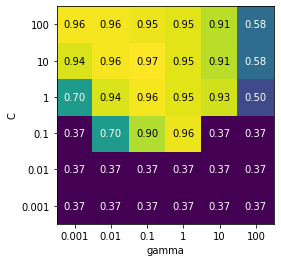

In [34]:
scores = np.array(result.mean_test_score).reshape(6, 6)

# 平均交差検定スコアをプロットします
mglearn.tools.heatmap(scores, xlabel='gamma',
                      xticklabels=param_grid['gamma'],
                      ylabel='C',
                      yticklabels=param_grid['C'],
                      cmap="viridis")

**Figure 5-8. Heat map of mean cross-validation score as a function of C and gamma**

ヒートマップの各ポイントは、特定のパラメータ設定を使用した1回の交差検定に対応します。  
色は交差検定の精度をエンコードします。  
明るい色は高精度を意味し、暗い色は低精度を意味します。  
SVCはパラメータの設定に非常に敏感であることがわかります。  
多くのパラメーター設定では、精度は約40％であり、これはかなり悪いです。他の設定の場合、精度は約96％です。  
このプロットからいくつかのことを取り除くことができます。  
両方のパラメーター（Cとガンマ）は、それらを調整すると精度が40％から96％に変わる可能性があるため、非常に重要です。  
さらに、パラメーター用に選択した範囲は、結果に大きな変化が見られる範囲です。  
パラメータの範囲が十分に大きいことに注意することも重要です。  
各パラメータの最適値はプロットの端にありません。  
次に、検索範囲が適切に選択されていないために結果が理想的ではないいくつかのプロット（図5-9に示されている）を見てみましょう。

In [35]:
file_name = "images/figure_5_9.png"
mc = plt.imread(file_name)
plt.figure(figsize=(15, 8))
plt.imshow(mc)

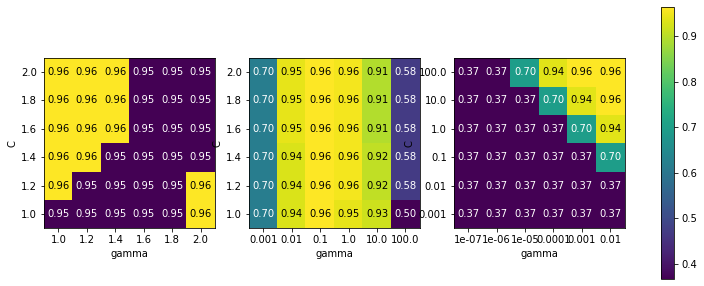

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # 平均交差検定スコアをプロットします
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

（図5-9に示なども）最初のパネルはまったく変化がなく、パラメータグリッド全体で一定の色を示しています。  
この場合、これはパラメータCとガンマの不適切なスケーリングと範囲が原因です。  
ただし、さまざまなパラメータ設定で精度の変化が見られない場合は、パラメータがまったく重要ではない可能性もあります。  
通常、最初に非常に極端な値を試して、パラメーターを変更した結果として精度に変化がないかどうかを確認することをお勧めします。    

2番目のパネルは縦縞模様を示しています。これは、ガンマパラメータの設定のみが違いを生むことを示しています。  
これは、ガンマパラメータが興味深い値を検索しているが、Cパラメータは検索していないことを意味している可能性があります。  
または、Cパラメータが重要ではないことを意味している可能性があります。  

3番目のパネルは、Cとガンマの両方の変化を示しています。  
ただし、プロットの左下全体では、興味深いことは何も起こっていないことがわかります。  
将来のグリッド検索から非常に小さい値を除外できる可能性があります。  
最適なパラメータ設定は右上にあります。  
最適値はプロットの境界にあるため、この境界を超えてさらに良い値が存在する可能性があり、この領域により多くのパラメーターを含めるように検索範囲を変更することもできます。  

相互検証スコアに基づいてパラメーターグリッドを調整することは完全に問題なく、さまざまなパラメーターの重要性を調査するための良い方法です。  
しかし、最終的なテストセットで異なるパラメータ範囲をテストすべきではありません。  
先に説明したように、テストセットの評価は、どのモデルを使用したいかが正確に分かってから行うべきです。

**Search over spaces that are not grids(グリッドではないスペースを検索する)**

場合によっては、GridSearchCVが通常行うように、すべてのパラメーターの可能なすべての組み合わせを試すことはお勧めできません。  
たとえば、SVCにはkernelパラメータがあり、選択したカーネルに応じて、他のパラメータが関連します。  
kernel = 'linear'の場合、モデルは線形であり、Cパラメーターのみが使用されます。  
kernel = 'rbf'の場合、Cパラメーターとgammaパラメーターの両方が使用されます（ただし、次数などの他のパラメーターは使用されません）。  
この場合、C、gamma(ガンマ)、kernel(カーネル)の可能なすべての組み合わせを検索しても意味がありません。  
kernel= 'linear'の場合、ガンマは使用されず、ガンマに異なる値を試すのは時間の無駄になります。  
これらの種類の「条件付き」パラメーターを処理するために、GridSearchCVではparam_gridを辞書のリストにすることができます。  
リスト内の各辞書は、独立したグリッドに展開されます。  
kernelとパラメータを含む可能なグリッド検索は、次のようになります。

In [37]:
param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grid:\n{}".format(param_grid))

List of grid:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


最初のグリッドでは、カーネルパラメーターは常に「rbf」に設定され（カーネルのエントリは長さ1のリストであることに注意してください）、Cパラメーターとガンマパラメーターの両方が変化します。  
2番目のグリッドでは、カーネルパラメーターは常に「linear」に設定され、Cのみが変更されます。  
次に、このより複雑なパラメータ検索を適用しましょう。

In [39]:
# from sklearn.model_selection import GridSearchCV
# from slearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score:
      {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


cv_results_をもう一度見てみましょう。  
予想どおり、カーネルが「線形」の場合、Cのみが変化します。

In [43]:
results = pd.DataFrame(grid_search.cv_results_)
# ページにぴったり合うように、転置されたテーブルを表示します
display(results.T)

0   \
mean_fit_time                                          0.00123076   
std_fit_time                                          0.000329671   
mean_score_time                                       0.000554323   
std_score_time                                        0.000162564   
param_C                                                     0.001   
param_gamma                                                 0.001   
param_kernel                                                  rbf   
params              {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
split0_test_score                                        0.347826   
split1_test_score                                        0.347826   
split2_test_score                                        0.363636   
split3_test_score                                        0.363636   
split4_test_score                                        0.409091   
mean_test_score                                          0.366403   
std_test_score                                          0.0224845   
rank_test_score                                                27   
split0_train_score                                       0.370787   
split1_train_score                                       0.370787   
split2_train_score                                       0.366667   
split3_train_score                                       0.366667   
split4_train_score                                       0.355556   
mean_train_score                                         0.366092   
std_train_score                                        0.00558129   

                                                              1   \
mean_fit_time                                        0.000882673   
std_fit_time                                         4.89118e-05   
mean_score_time                                      0.000420141   
std_score_time                                        2.6244e-05   
param_C                                                    0.001   
param_gamma                                                 0.01   
param_kernel                                                 rbf   
params              {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}   
split0_test_score                                       0.347826   
split1_test_score                                       0.347826   
split2_test_score                                       0.363636   
split3_test_score                                       0.363636   
split4_test_score                                       0.409091   
mean_test_score                                         0.366403   
std_test_score                                         0.0224845   
rank_test_score                                               27   
split0_train_score                                      0.370787   
split1_train_score                                      0.370787   
split2_train_score                                      0.366667   
split3_train_score                                      0.366667   
split4_train_score                                      0.355556   
mean_train_score                                        0.366092   
std_train_score                                       0.00558129   

                                                             2   \
mean_fit_time                                       0.000925875   
std_fit_time                                        2.10266e-05   
mean_score_time                                     0.000449371   
std_score_time                                      1.71419e-05   
param_C                                                   0.001   
param_gamma                                                 0.1   
param_kernel                                                rbf   
params              {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}   
split0_test_score                                      0.347826   
split1_test_score                                      0.347826   
split2_test_score                   

cross_val_scoreと同様に、GridSearchCVは、分類にデフォルトで層化k分割交差検定(stratified k-fold cross-validation)を使用し、回帰にk分割交差検定を使用します。  
ただし、「More control over cross-validation(相互検証のより詳細な制御)」で説明されているように、GridSearchCVのcvパラメーターとして任意の相互検証スプリッターを渡すこともできます。  
特に、トレーニングセットと検証セットに1つの分割のみを取得するには、n_splits = 1で ShuffleSplit または StratifiedShuffleSplit を使用できます。  
これは、非常に大きなデータセットや非常に遅いモデルに役立つ場合があります。

**Nested Cross-Validation(ネストされた交差検証)**  
前の例では、データの単一分割をトレーニング、検証、およびテストセットに使用することから、データをトレーニングセットとテストセットに分割してから、トレーニングセットに対して交差検証を実行することへと移行しました。  
ただし、前述のようにGridSearchCVを使用すると、データがトレーニングセットとテストセットに1つに分割されるため、結果が不安定になり、この1つに分割されたデータに依存しすぎる可能性があります。  
さらに一歩進んで、元のデータを一度トレーニングセットとテストセットに分割する代わりに、交差検定の複数の分割を使用できます。  
これにより、いわゆるネストされた相互検証が行われます。  
ネストされた相互検証では、データをトレーニングセットとテストセットに分割するための外部ループがあります。  
それらのそれぞれについて、グリッド検索が実行されます（これにより、外側のループの分割ごとに異なる最適なパラメーターが生成される可能性があります）。  
次に、外側の分割ごとに、最適な設定を使用したテストセットのスコアが報告されます。  
この手順の結果は、スコアのリストであり、モデルではなく、パラメーター設定でもありません。  
スコアは、グリッド検索で見つかった最良のパラメーターを前提として、モデルがどの程度一般化されているかを示します。  
新しいデータで使用できるモデルが提供されていないため、将来のデータに適用する予測モデルを探すときに、ネストされた交差検定が使用されることはめったにありません。  
ただし、特定のデータセットで特定のモデルがどの程度うまく機能するかを評価する場合に役立ちます。  

scikit-learnでネストされた交差検証を実装するのは簡単です。モデルとしてGridSearchCVのインスタンスを使用してcross_val_scoreを呼び出します。

In [44]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.9800000000000001


ネストされた相互検証の結果は、「SVCはアイリスデータセットで98％の平均相互検証精度を達成できる」と要約できます。これ以上でもそれ以下でもありません。  

ここでは、内側と外側の両方のループで層化された5分割交差検定を使用しました。  
param_gridには36のパラメーターの組み合わせが含まれているため、これにより36 * 5 * 5 = 900のモデルが構築され、ネストされた相互検証は非常にコストのかかる手順になります。  
ここでは、内側と外側のループで同じ交差検定スプリッターを使用しました。  
ただし、これは必須ではなく、内側ループと外側ループで相互検証戦略を任意に組み合わせて使用できます。  
上記の1行で何が起こっているのかを理解するのは少し難しい場合があり、次の簡略化された実装で行われるように、ループの場合と同様に視覚化すると役立つ場合があります。

In [54]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 外側の交差検定におけるデータの分割ごとに
    #（splitメソッドはトレーニングパーツとテストパーツのインデックスを返します）
    for training_samples, test_samples in outer_cv.split(X, y):
        # 内部交差検定を使用して最適なパラメーターを見つける
        best_params = {}
        best_score = -np.inf
        # パラメータを反復処理します
        for parameters in parameter_grid:
            # 内側の分割でスコアを累積する
            cv_scores = []
            # 内部交差検定を繰り返します
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # パラメータとトレーニングデータを指定して分類器を構築する
                
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 内部テストセットで評価する
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 内側のひだの平均スコアを計算する
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # これまでよりも優れている場合は、パラメータを覚えておいてください
                best_score = mean_score
                best_params = parameters
        # 外部トレーニングセットを使用して、最良のパラメーターで分類器を構築します
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 評価する
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        return np.array(outer_scores)

それでは、irisデータセットでこの関数を実行してみましょう。

In [55]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scored = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


**Parallelizing cross-validation and grid search(クロス検証とグリッド検索の並列化)**

多くのパラメーターと大規模なデータセットでグリッド検索を実行することは計算が難しい場合がありますが、驚異的並列(embarrassingly parallel)でもあります。  
これは、特定の交差検定分割で特定のパラメーター設定を使用してモデルを構築することは、他のパラメーター設定およびモデルから完全に独立して実行できることを意味します。  
これにより、グリッド検索と交差検証は、複数のCPUコアまたはクラスターでの並列化の理想的な候補になります。  
n_jobsパラメーターを使用するCPUコアの数に設定することにより、GridSearchCVおよびcross_val_scoreで複数のコアを利用できます。  
n_jobs = -1を設定して、使用可能なすべてのコアを使用できます。  

モデルとGridSearchCVの両方でのn_jobsの設定は、scikit-learn 0.20.0以降でサポートされていますが、まだ十分にテストされていません。  
データセットとモデルが非常に大きい場合は、多くのコアを使用するとメモリが消費されすぎる可能性があります。  
大きなモデルを並行して構築する場合は、メモリ使用量を監視する必要があります。  

分散コンピューティングパッケージdaskを使用して、クラスター内の複数のマシンでグリッド検索と相互検証を並列化することもできます。  
詳細については、http：//distributed.dask.org/en/latest/joblib.htmlを参照してください。 

### Evaluation Metrics and Scoring(評価指標とスコアリング)

これまで、精度（正しく分類されたサンプルの割合）を使用して分類パフォーマンスを評価し、$R^2$を使用して回帰パフォーマンスを評価してきました。  
ただし、これらは、教師ありモデルが特定のデータセットでどの程度うまく機能するかを要約するための多くの可能な方法のうちの2つにすぎません。  
実際には、これらの評価メトリック(evaluation metrics)はアプリケーションに適していない可能性があり、モデルを選択してパラメータを調整するときに適切なメトリックを選択することが重要です。

#### Keep the End Goal in Mind(最終目標を念頭に置いてください)

指標を選択するときは、機械学習アプリケーションの最終目標を常に念頭に置く必要があります。  
実際には、私たちは通常、正確な予測を行うだけでなく、より大きな意思決定プロセスの一部としてこれらの予測を使用することに関心があります。  
機械学習の指標を選択する前に、ビジネス指標と呼ばれることが多い、アプリケーション
の高レベルの目標について考える必要があります。  
機械学習アプリケーションに特定のアルゴリズムを選択した場合の結果は、business impact(ビジネスへの影響と呼ばれます)$^2$。  
おそらく、高レベルの目標は、交通事故を回避すること、または入院数を減らすことです。  
それはまたあなたのウェブサイトのためにより多くのユーザーを獲得すること、またはユーザーにあなたの店でより多くのお金を使わせることかもしれません。  
モデルを選択したり、パラメーターを調整したりするときは、ビジネス指標に最もプラスの影響を与えるモデルまたはパラメーターの値を選択する必要があります。  
特定のモデルのビジネスへの影響を評価するには、実際のシステムでモデルを実稼働させる必要がある場合があるため、これは難しいことがよくあります。  

開発の初期段階では、パラメータを調整するために、関連する可能性のある高いビジネスリスクまたは個人的なリスクのために、テスト目的でモデルを本番環境に移行することはしばしば実行不可能です。  
自動運転車の歩行者回避能力を、最初に確認せずに運転させるだけで評価することを想像してみてください。  
あなたのモデルが悪いと、歩行者は困ります！  
したがって、計算が容易な評価指標を使用して、代理評価手順を見つける必要があることがよくあります。  
たとえば、歩行者の画像を非歩行者に対して分類することをテストし、精度を測定することができます。  
これは単なる代理であり、評価が可能な元のビジネス目標に最も近いメトリックを見つけることで成果が得られることに注意してください。  
この最も近いメトリックは、モデルの評価と選択に可能な限り使用する必要があります。この評価の結果は単一の数値ではない可能性があります。  
アルゴリズムの結果、顧客数は10％増加しますが、各顧客の支出は15％減少しますが、あるモデルを別のモデルよりも選択した場合に予想されるビジネスへの影響を把握できるはずです。  

このセクションでは、最初に二項分類の重要な特殊なケースのメトリックについて説明し、次にマルチクラス分類、最後に回帰に移ります。  

> 2: 科学に関心のある読者には、このセクションの商用言語の言い訳をお願いします。  
最終目標を見失わないことは、科学においても同様に重要ですが、著者は、その領域で使用されている「ビジネスへの影響」と同様のフレーズを認識していません。

#### Metrics for Binary Classification(二項分類のメトリクス)

二項分類は、間違いなく、実際の機械学習の最も一般的で概念的に単純なアプリケーションです。  
ただし、この単純なタスクでさえ評価する際には、まだ多くの注意点があります。  
別の指標に飛び込む前に、測定精度が誤解を招く可能性がある方法を見てみましょう。  
二項分類では、ポジティブクラスが私たちが探しているものであることを理解した上で、ポジティブクラスとネガティブクラスについて話すことがよくあります。

**KINDS OF ERRORS(エラーの種類)**  

多くの場合、間違いの数には関心のあるすべての情報が含まれていないため、精度は予測パフォーマンスの適切な尺度ではありません。  
自動テストを使用して癌の早期発見をスクリーニングするアプリケーションを想像してみてください。  
テストが陰性の場合、患者は健康であると見なされ、テストが陽性の場合、患者は追加のスクリーニングを受けます。  
ここでは、陽性テスト（がんの兆候）を陽性クラスと呼び、陰性テストを陰性クラスと呼びます。  
モデルが常に完全に機能するとは限りません。  
間違いを犯します。  
どのようなアプリケーションでも、これらの間違いの結果が現実の世界にどのような影響を与える可能性があるかを自問する必要があります。  

一つ考えられる間違いは、健康な患者が陽性に分類され、追加検査が必要になることです。これは、いくつかの費用と患者さんの不便さ（そしておそらく精神的苦痛）につながります。  
不正確な陽性予測は偽陽性(false positive)と呼ばれます。もう一つ考えられる間違いは、病気の患者さんが陰性(nagative)に分類され、さらなる検査や治療を受けられなくなることです。  
診断されていないがんは深刻な健康問題を引き起こし、致命的になる可能性さえあります。  
この種の誤り、つまり不正確な陰性の予測は偽陰性(false negative)と呼ばれています。  
統計学では、偽陽性はtype I error、偽陰性はtype II errorとしても知られています。  
ここでは、「偽陰性」と「偽陽性」の方がより明確で覚えやすいので、「偽陰性」と「偽陽性」にこだわることにします。  
がん診断の例では、偽陰性はできる限り避けたいのは明らかですが、偽陽性は些細な迷惑とみなされることがあります。  

これは特に思い切った例ですが、偽陽性と偽陰性の結果が同じになることはほとんどありません。  
商用アプリケーションでは、両方の種類のミスにドル値を割り当てることが可能で、特定の予測の誤差を精度ではなくドルで測定することができます。  
これは、どのモデルを使用するかのビジネス上の意思決定を行う際に、より意味のあることかもしれません。

**IMBALANCED DATASETS(不均衡なデータセット)**  

2つのクラスのうちの1つが他のクラスよりもはるかに頻繁に発生する場合、エラーの種類が重要な役割を果たします。  
これは実際には非常に一般的なことです。  
良い例はクリックスルー予測で、各データポイントは「インプレッション」、つまりユーザーに表示されたアイテムを表します。  
この項目は、広告であったり、関連するストーリーであったり、ソーシャルサイトでフォローする関係者であったりするかもしれません。  
目標は、特定のアイテムを見せられた場合、ユーザーがそのアイテムをクリックするかどうか（興味を持っていることを示す）を予測することです。  
ユーザーがインターネット上で表示されるほとんどのもの（特に広告）は、クリックされることはありません。  
ユーザーがクリックするほど面白いものを見つけるまでには、100個の広告や記事を表示する必要があるかもしれません。  
この結果、99個の「クリックされない」データポイントごとに、1個の「クリックされた」データポイントがあるデータセットができあがります;  
言い換えれば、サンプルの99%が「クリックされない」クラスに属します。  
一方のクラスが他方のクラスよりもはるかに頻度が高いデータセットは、しばしば、不均衡データセット、または不均衡なクラスを持つデータセットと呼ばれます。  
実際には、不均衡なデータが標準であり、関心のあるイベントがデータ内で同じか、あるいは同じような頻度であることはまれです。  

さて、クリック予測タスクで99%の精度を持つ分類器を構築したとしましょう。  
これは何を示しているのでしょうか？  
99%の精度は印象的に聞こえますが、これはクラスの不均衡を考慮に入れていません。  
機械学習モデルを構築しなくても、常に「クリックなし」を予測することで99%の精度を達成することができます。  
一方で、不均衡なデータであっても、99%の精度のモデルは実際にはかなり良いものになります。  
しかし、精度では、常に「ノークリック」を予測しているモデルと、潜在的に良いモデルを区別することはできません。  

説明するために、不均衡なデータセットから、他の9つのクラスに対して桁の9を分類することで、9:1の不均衡なデータセットを作成します。

In [57]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

DummyClassifierを使って、常に多数派クラス（ここでは「not nine」）を予測することで、どれだけ非情報的な正答率(accuracy)が得られるかを見てみましょう。

In [58]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


何も学ばずに90％近い正答率(accuracy)を得ました。  
これは印象的に見えるかもしれませんが、ちょっと考えてみてください。  
誰かが自分のモデルは90%の正答率(accuracy)だと言っていると想像してみてください。  
あなたは、彼らは非常に良い仕事をしたと思うかもしれません。  
しかし，問題によっては，1つのクラスを予測するだけで可能かもしれません。  
これを実際の分類器を使った場合と比較してみましょう。

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

精度によると、DecisionTreeClassifier は、定数予測器よりもわずかに優れています。  
これは、DecisionTreeClassifier の使用方法に何か問題があるか、あるいは精度が実際にはここでは良い指標ではないことを示しています。  

比較のために、さらに2つの分類器、LogisticRegressionとデフォルトのDummyClassifierを評価してみましょう。

In [62]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.81
logreg score: 0.98


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ランダム出力を生成するダミーの分類器は、LogisticRegressionが非常に良い結果を出すのに対し、（正答率-accuracy-の点で）明らかに最も悪いものです。  
しかし、ランダムな分類器でさえ、80%以上の正答率(accuracy)が得られます。このため、これらの結果のうちどれが実際に役に立つのかを判断するのは非常に困難です。  
ここでの問題は、正答率(accuracy)が、この不均衡な設定での予測性能を定量化するための不十分な尺度であるということです。  
この章の残りの部分では、モデルを選択する際により良いガイダンスを提供する代替指標(alternative metrics)を探ります。  
特に、pred_most_frequentとpred_dummyで計算されているように、モデルが "最も頻繁な "予測やランダムな予測を行うよりもどれだけ優れているかを教えてくれるメトリクスが欲しいと思います。  
モデルを評価するためにメトリクスを使用すれば、これらの無意味な予測を取り除くことができるはずです。

**confusion matrices(混同行列)**  

二項分類の評価結果を表す最も包括的な方法の1つは、混同行列を使用することです。  
confusion_matrix関数を使用して、前のセクションからのLogisticRegressionの予測を調べてみましょう。  
予測は、pred_logregのテストセットにすでに保存されています。

In [65]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


confusion_matrixの出力は，2×2の配列で，行はtrueのクラス，列は予測されたクラスに対応します。  
各エントリは，行に対応するクラス（ここでは，"nineではない "と "nine"）に属する標本が，列に対応するクラスとして分類された回数をカウントします。  
次のプロット（図5-10）は、この意味を示しています。

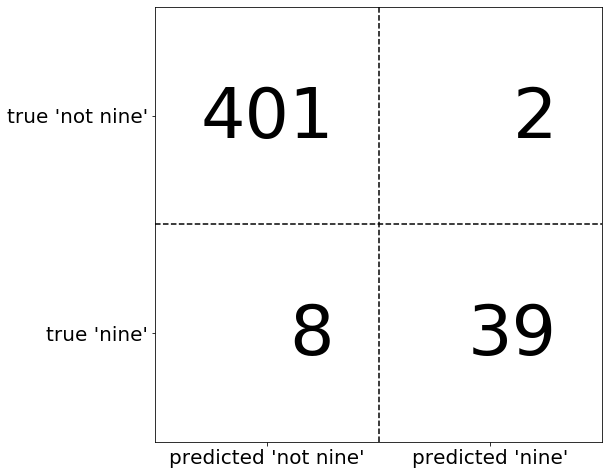

In [66]:
mglearn.plots.plot_confusion_matrix_illustration()

**Figure 5-10. Confusion matrix of the “nine vs. rest” classification task**

混同行列の主対角$^3$上のエントリは正しい分類に対応しており，他のエントリは，あるクラスのサンプルが別のクラスとして誤って分類された数を示しています。  

「a nine」を正のクラスと宣言すると，混同行列のエントリを先に紹介した偽陽性と偽陰性という用語と関連付けることができる。  
図を完成させるために，正のクラスに属する正しく分類された標本を真の陽性，負のクラスに属する正しく分類された標本を真の陰性と呼ぶ。  
これらの用語は通常FP, FN, TP, TNと略され、混同行列の解釈は以下のようになります（図5-11）。

> 3: 2次元配列または行列Aの主対角線はA[i、i]です。

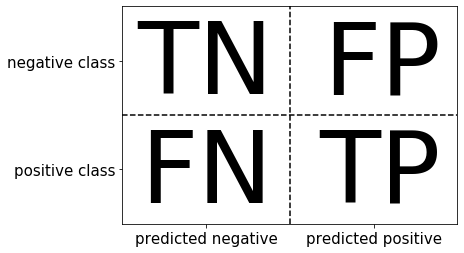

In [68]:
mglearn.plots.plot_binary_confusion_matrix()

**Figure 5-11. Confusion matrix for binary classification**

次に、混同行列を使用して、以前に適合させたモデル（2つのダミーモデル、決定木、およびロジスティック回帰）を比較してみましょう。

In [69]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[364  39]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


混同行列を見ると、pred_most_frequentに問題があることは明らかです。  
これは、常に同じクラスを予測するためです。  
一方、pred_dummyは、特に偽陰性と偽陽性の数と比較して、真陽性の数が非常に少ない（5）。  
真陽性よりも多くの偽陽性があります。  
精度はほぼ同じですが、決定木(decision tree)によって行われる予測は、dummyの予測よりもはるかに理にかなっています。  
本質的に、ロジスティック回帰はすべての面でpred_treeよりも優れていることがわかります。  
つまり、真陽性と真陰性が多く、偽陽性と偽陰性が少なくなっています。  
この比較から、決定木とロジスティック回帰のみが妥当な結果をもたらし、ロジスティック回帰はすべてのアカウントでツリーよりもうまく機能することが明らかです。  
ただし、完全な混同行列を調べるのは少し面倒であり、行列のすべての側面を調べることで多くの洞察を得ることができましたが、プロセスは非常に手動で定性的でした。  
混同行列の情報を要約する方法はいくつかありますが、次に説明します。

**Relational on accuracy(精度との関係)**  

結果を混同行列に要約する1つの方法、つまり精度(accuracy)を計算する方法はすでに見ました。  
これは次のように表すことができます。  

\begin{align*}
&Accuracy = TP + TNTP + TN + FP + FN&\\
&Accuracy = \frac{TP + TN}{TP + TN + FP + FN}&
\end{align*}

言い換えると、精度は、正しい予測（TPおよびTN）の数をすべてのサンプルの数（混同行列のすべてのエントリの合計）で割ったものです。

**Precision, recall, and f-score(適合率、再現率、およびfスコア)**  

混同行列を要約する方法は他にもいくつかありますが、最も一般的な方法は適合率(precision)と再現率(recall)です。  
精度は、陽性と予測されたサンプルのうち実際に陽性であるものの数を測定します。  

\begin{align*}
&Precision = TPTP + FP&\\
&Precision = \frac{TP}{TP + FP}&
\end{align*}  

目標が誤検知(false positives)の数を制限することである場合、適合率(precision)はパフォーマンスメトリックとして使用されます。  
例として、新薬が臨床試験で病気の治療に有効であるかどうかを予測するためのモデルを想像してみてください。  
臨床試験は費用がかかることで有名であり、製薬会社は、薬が実際に機能することが非常に確実である場合にのみ実験を実行したいと思うでしょう。  
したがって、モデルが多くの誤検知を生成しないこと、つまり、モデルの適合率(precision)が高いことが重要です。  
適合率(precision)は、正の予測値-positive predictive value-（PPV）とも呼ばれます。  

一方、ポジティブ予測によってキャプチャされたポジティブサンプルの数を測定することを思い出してください。  

\begin{align*}
&Recall = TPTP + FN&\\
&Recall = \frac{TP}{TP + FN}&
\end{align*}

すべての陽性サンプルを特定する必要がある場合、リコールはパフォーマンスメトリックとして使用されます。  
つまり、偽陰性(false negative)を回避することが重要な場合です。  
この章の前半の癌診断の例は、この良い例です。  
予測に健康な患者を含め、病気のすべての人を見つけることが重要です。  
Recallの他の名前は、感度(sensitivity)、ヒット率(hit rate)、または真陽性率(positive rate)（TPR）です。  

再現率(Recall)の最適化と精度(Precision)の最適化の間にはトレードオフがあります。  
すべてのサンプルがポジティブクラスに属すると予測すれば、簡単に完全な再現率(Recall)を得ることができます。偽陰性(false nagative)も偽陽性(true nagative)もありません。  
ただし、すべてのサンプルを陽性として予測すると、多くの誤検出が発生するため、精度は非常に低くなります。  
一方で、最も確実に正であると思われる1つのデータ点のみを正、残りの点を負として予測するモデルを見つけた場合、精度(Precision)は完璧になりますが（このデータ点が実際に正であると仮定して）、再現率(Recall)は非常に悪くなります。  

> TIP  
精度とリコールはTP、FP、TN、FNから派生した多くの分類対策のうちの2つに過ぎない。  
ウィキペディアでは、すべての尺度の素晴らしい要約を見つけることができます。  
機械学習のコミュニティでは、精度とリコールは間違いなく2値分類(binary classifier)のために最も一般的に使用される尺度ですが、他のコミュニティでは他の関連する尺度を使用しているかもしれません。  

したがって、適合率(Precision)と再現率(Rcall)は非常に重要な手段ですが、そのうちの1つだけを見ても、全体像を把握することはできません。  
それらを要約する1つの方法は、適合率と再現率の調和平均(harmonic mean)を使用するf-scoreまたはf-measureです。  

\begin{align*}
&F = 2 ・ precision - recall precision + recall&\\
&F = 2 ・ \frac{precision -recall}{precision + recall}&
\end{align*}

この特定のバリアントは、$f_1-score$としても知られています。Prercision(適合率)とRecall(再現率)を考慮に入れているので、不均衡なバイナリ2値分類データセットでは、適合率(Precision)よりも優れた尺度となります。   
以前に計算した「nine対rest」データセットの予測で実行してみましょう。  
ここでは、「neine」クラスがポジティブクラスであると想定します（残りはFalseとしてラベル付けされ、残りはFalseとしてラベル付けされます）。
したがって、ポジティブクラスは少数派クラスです。

In [72]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.11
f1 score tree: 0.55
f1 score logistic regression: 0.92


ここで2つのことに注意することができます。  
まず、正のクラスの予測がなかったため、most_frequent予測のエラーメッセージが表示されます（これにより、f-scoreの分母がゼロになります）。  
また、dummy予測とtree予測の間にかなり強い違いが見られます。  
これは、精度(accuaracy)だけでは明確ではありませんでした。  
評価にf-scoreを使用して、予測パフォーマンスを1つの数値に再度要約しました。  
ただし、f-scoreは、精度(accuracy)よりも優れたモデルを作成する理由についての直感を捉えているようです。ただし、f-scoreの欠点は、正確さよりも解釈と説明が難しいことです。  

適合率(precision)、再現率(recall)、および$f_1-score$のより包括的な要約が必要な場合は、classification_report便利関数を使用して、3つすべてを一度に計算し、それらを適切な形式で出力できます。

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                           target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification_report関数は、クラス（ここでは、TrueとFalse）ごとに1行を生成し、このクラスを正のクラスとして、適合率、再現率、およびf-scoreを報告します。  
以前は、少数派の「nine」クラスがポジティブクラスであると想定していました。  
正のクラスを「not nine」に変更すると、classification_reportの出力から、most_frequentモデルで0.94のfスコアが得られることがわかります。  
さらに、「not nine」クラスでは、すべてのサンプルを「not nine」に分類したため、1のリコールがあります。  
f-scoreの隣の最後の列は、各クラスのサポートを提供します。  
これは、graound truthに従ったこのクラスのサンプル数を意味します。  

分類レポートの3つの追加行は、適合率、再現率、および$f_1-score$の平均を示しています。  
マクロ平均は単にクラス全体の平均を計算しますが、加重平均はクラス内のサンプル数で加重された加重平均を計算します。  
これらは両方のクラスの平均であるため、これらのメトリックは正のクラスの概念を必要としません。  
また、正のクラスの適合率(precision)や再現率(recall)だけを調べるのとは対照的に、両方のクラスを平均すると、単一の数値で意味のあるメトリックが得られます。  
さらに2つのレポートがあります。  
1つはdummy classifier用で、もう1つはrogistic regression(ロジスティック回帰)用です。

In [76]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.90      0.90       403
        nine       0.11      0.11      0.11        47

    accuracy                           0.82       450
   macro avg       0.51      0.50      0.50       450
weighted avg       0.81      0.82      0.82       450



In [77]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



レポートを見るとお気づきかもしれませんが、dummyモデルと非常に優れたモデルの違いはもはや明確ではありません。  
ポジティブクラスとして宣言されているクラスを選択すると、メトリックに大きな影響があります。  
ダミー分類のf-scoreは「nine」クラスでは0.10（ロジスティック回帰では0.89）ですが、「not nine」クラスでは0.91対0.99であり、どちらも妥当な結果のようです。  
ただし、すべての数値を一緒に見ると、かなり正確な図が描かれ、ロジスティック回帰モデルの優位性がはっきりとわかります。

**Taking uncertainty in to account(アカウントに不確実性を取り入れること)**  
混同行列(confusion matrix)と分類レポートは、特定の予測セットの非常に詳細な分析を提供します。  
ただし、予測自体は、モデルに含まれている多くの情報をすでに破棄しています。  
第2章で説明したように、ほとんどの分類子は、予測に関する確実性の程度を評価するために、decision_functionまたはpredict_probaメソッドを提供します。  
予測を行うことは、特定の固定小数点でdecision_functionまたはpredict_probaの出力をしきい値処理することと見なすことができます。  
二項分類(bainary classification)では、決定関数に0を使用し、predict_probaに0.5を使用します。  

以下は、不均衡な二項分類タスクの例であり、負のクラスの400ポイントが、正のクラスの50ポイントに対して分類されています。  
トレーニングデータは、図5-12の左側に示されています。  
このデータでカーネルSVMモデルをトレーニングします。  
トレーニングデータの右側のプロットは、ヒートマップとしての決定関数の値を示しています。  
上部中央のプロットに黒い円が表示されます。  
これは、decision_functionのしきい値が正確にゼロであることを示しています。  
この円の内側のポイントはポジティブクラスとして分類され、外側のポイントはネガティブクラスとして分類されます。

In [78]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

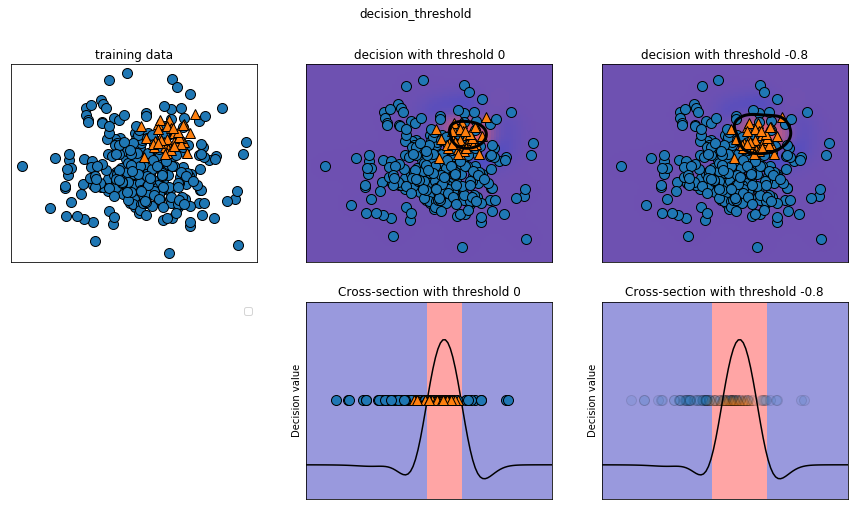

In [80]:
mglearn.plots.plot_decision_threshold()

**Figure 5-12. Heatmap of the decision function and the impact of changing the decision threshold** 

Classification_report関数を使用して、両方のクラスの適合率と再現率を評価できます。

In [81]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



クラス1の場合、適合率はかなり低く、再現率はまちまちです。  
クラス0は非常に大きいため、分類子は、小さいクラス1ではなく、クラス0を正しく取得することに重点を置いています。  

このアプリケーションでは、前述のがん検診の例のように、クラス1の再現率を高くすることがより重要であると想定します。  
これは、より多くの真陽性（Recallが増加する）と引き換えに、より多くの偽陽性（偽クラス1）のリスクを冒すことをいとわないことを意味します。  
svc.predictによって生成された予測は実際にはこの要件を満たしていませんが、決定しきい値を0から変更することで、クラス1のより高いリコールに焦点を合わせるように予測を調整できます。  
デフォルトでは、decision_function値が0より大きいポイントはクラス1として分類されます。  
より多くのポイントをクラス1として分類する必要があるため、しきい値を下げる必要があります。

In [82]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

この予測の分類レポートを見てみましょう。

In [83]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



予想通り、クラス1のリコール(Recall)は上がり、適合率(Precision)は下がりました。  
図5-12の右上のパネルに示すように、現在、より広い空間領域をクラス1として分類しています。  
リコールやその逆よりも適合率を重視する場合、またはデータのバランスが非常に悪い場合は、決定しきい値(decision threshold)を変更するのがより良い結果を得る最も簡単な方法です。  
Decision_functionは任意の範囲を持つことができるため、しきい値の選択方法に関する経験則を提供することは困難です。  
しきい値を設定する場合は、テストセットを使用して設定しないように注意する必要があります。  
他のパラメーターと同様に、テストセットに決定しきい値を設定すると、過度に楽観的な結果が得られる可能性があります。  
代わりに、検証セットまたは交差検証を使用してください。　　

> WOANING  
簡単にするために、上記のコードのテストセットの結果に基づいてしきい値を変更しました。  
実際には、テストセットではなく、hold-out varidationセットを使用する必要があります。  
他のパラメーターと同様に、テストセットに決定しきい値を設定すると、過度に楽観的な結果が得られる可能性があります。  
代わりに、検証セットまたは相互検証を使用してください。  

予測値の出力は0から1の固定スケールであり、確率をモデル化するため、predict_probaメソッドを実装するモデルのしきい値を選択する方が簡単です。  
デフォルトでは、しきい値0.5は、モデルが50％を超えて、ポイントがポジティブクラスであることを「確信」している場合、そのように分類されることを意味します。  
しきい値を上げると、モデルは肯定的な決定を行うためにより自信を持っている必要があります（そして否定的な決定を行うためにより自信がない必要があります）。  
確率の操作は任意のしきい値の操作よりも直感的かもしれませんが、すべてのモデルが不確実性の現実的なモデルを提供するわけではありません（完全な深さまで成長したディシジョンツリーは、多くの場合間違っている場合でも、常に100％確実に決定されます）。  
これは、キャリブレーションの概念に関連しています。  
キャリブレーションされたモデルは、その不確かさの正確な測定値を提供するモデルです。  
キャリブレーションの詳細については、この本の範囲を超えていますが、詳細については、AlexandruNiculescu-MizilとRichCaruanaによる「 Predicting Good Probabilities with Supervised Learning(教師あり学習による良好な確率の予測)」を参照してください。

**Precision-Recall Curves and Roc Curves(適合率-再現率曲線とROC曲線)**  

先ほど説明したように、モデルで分類の決定を行うために使用されるしきい値を変更することは、特定の分類器の適合率と再現率のトレードオフを調整する方法です。  
ポジティブサンプルの10％未満を見逃したい場合があります。  
これは、90％の望ましいリコールを意味します。  
この決定はアプリケーションによって異なり、ビジネス目標に基づいて決定する必要があります。  
特定の目標（たとえば、クラスの特定のリコールまたは精度値）が設定されると、しきい値を適切に設定できます。  
90％のリコールなど、特定の目標を達成するためのしきい値を設定することは常に可能です。  
難しいのは、このしきい値で妥当な精度を維持できるモデルを開発することです。  
すべてを正として分類すると、100％のリコールが発生しますが、モデルは役に立たなくなります。  

90％のリコールなどの分類子に要件を設定することは、動作点(oparating point)の設定と呼ばれることがよくあります。  
動作点を修正すると、ビジネス設定で顧客や組織内の他のグループにパフォーマンスを保証するのに役立つことがよくあります。  

多くの場合、新しいモデルを開発するとき、動作点が何であるかが完全に明確ではありません。  
このため、モデリングの問題をよりよく理解するには、考えられるすべてのしきい値、または適合率と再現率の考えられるすべてのトレードオフを一度に確認することをお勧めします。  
これは、precision-recall curve(適合率-再現率曲線)と呼ばれるツールを使用して可能です。  
precision-recallを計算する関数は、sklearn.metricsモジュールにあります。  
これには、decision_functionまたはpredict_probaのいずれかを介して作成されたground truth labelingと予測されるuncertainties(不確実性)が必要です。

In [88]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

precision_recall_curve関数は、可能なすべてのしきい値（決定関数に表示されるすべての値）の適合率と再現率の値のリストを並べ替えられた順序で返すため、図5-13に示すように、曲線をプロットできます。

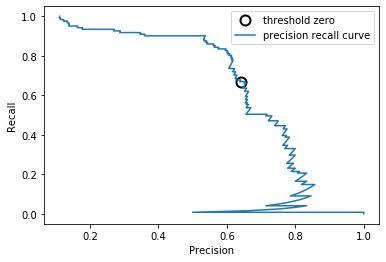

In [90]:
# より滑らかな曲線のためにより多くのデータポイントを使用する
X, y = make_blobs(n_samples=(4000,  500), cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

# ゼロに最も近いしきい値を見つける
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o',
        markersize=10, label="threshold zero", fillstyle="none",
        c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Figure 5-13. Precision recall curve for SVC(gamma=0.05)**

図5-13の曲線に沿った各ポイントは、decision_functionの可能なしきい値に対応しています。  
たとえば、約0.75の精度で0.4のリコールを達成できることがわかります。  
黒い円は、decision_functionのデフォルトのしきい値であるしきい値0に対応するポイントを示しています。  
この点は、predictメソッドを呼び出すときに選択されるトレードオフです。  

曲線が右上隅に近いほど、分類器は優れています。  
右上の点は、同じしきい値に対して高適合率と高再現率を意味します。  
曲線は、非常に低いしきい値に対応する左上隅から始まり、すべてを正のクラスとして分類します。  
しきい値を上げると、曲線がより高い適合率に移動しますが、再現率も低くなります。  
しきい値をますます上げると、ポジティブとして分類されたポイントのほとんどが真のポジティブであるという状況になり、非常に高い精度が得られますが、リコールは低くなります。  
適合率が上がるにつれてモデルが高いリコールを維持するほど、優れています。  

この特定の曲線をもう少し見ると、このモデルを使用すると、非常に高い再現率で最大約0.5の適合率を得ることができることがわかります。  
より高い適合率が必要な場合は、多くのリコールを犠牲にする必要があります。  
つまり、左側の曲線は比較的平坦です。  
つまり、適合率を上げる必要がある場合でも、リコールはそれほど低下しません。  
0.5を超える適合率の場合、適合率が上がるたびに多くのリコールが発生します。  

さまざまな分類器は、曲線のさまざまな部分、つまりさまざまな動作点でうまく機能します。  
トレーニングしたSVMを、同じデータセットでトレーニングしたRandom Forestと比較してみましょう。  
RandomForestClassifierにはdecision_functionはなく、predict_probaのみがあります。  
precision_recall_curve関数は、2番目の引数として正のクラス（クラス1）の確実性の尺度を期待するため、サンプルがクラス1、つまりrf.predict_proba（X_test）[:, 1]である確率を渡します。  
二項分類におけるpredict_probaのデフォルトのしきい値は0.5であるため、これは曲線上でマークしたポイントです（図5-14を参照）。

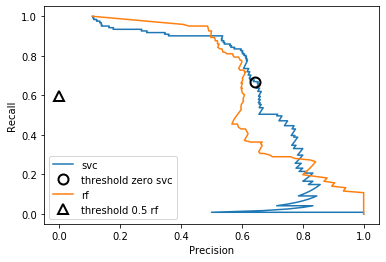

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0,
                           max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifierにはpredict_probaがありますが、
# decision_functionはありません
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero],
        'o',
        markersize=10,
        label="threshold zero svc",
        fillstyle="none", 
        c='k',
        mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],
        '^',
        c='k',
        markersize=10,
        label="threshold 0.5 rf",
        fillstyle="none",
        mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Figure 5-14. Comparing precision recall curves of SVM and random forest**

比較プロットから、非常に高い再現率(Recall)または非常に高い適合率(Precision)の要件に対して、random forestのパフォーマンスが極端に優れていることがわかります。  
中間付近（約適合率= 0.7）では、SVMのパフォーマンスが向上します。  
全体的なパフォーマンスを比較するために$f_1-score$だけを見た場合、これらの微妙な点を見逃していたでしょう。 $f_1-score$は、Precision-recall curve上の1つのポイントのみをキャプチャします。  
これは、デフォルトのしきい値で指定されたポイントです。

In [95]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(
    f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


2つのprecision-recall(PR)曲線を比較すると、多くの詳細な洞察が得られますが、かなり手動のプロセスです。  
モデルの自動比較のために、特定のしきい値や動作点に限定することなく、曲線に含まれる情報を要約したい場合があります。  
precision-recall 曲線を要約する1つの特定の方法は、平均適合率(average precision)としても知られるprecision-recall 曲線の曲線の下の積分(integral)または面積(area)を計算することです$^4$。  
average_precision_score関数を使用して、平均適合率を計算できます。  
precision-recall 曲線を計算し、複数のしきい値を考慮する必要があるため、decision_functionまたはpredict_probaの結果は、predictの結果ではなく、average_precision_scoreに渡す必要があります。  

> 4:
precision-recall 曲線の下の領域と平均適合率の間には、いくつかの小さな技術的な違いがあります。  
しかし、この説明は一般的な考え方を伝えています。

In [96]:
from sklearn.metrics import average_precision_score

# decision_functionまたはpredict_probaの結果は、predictの結果ではなく、
# average_precision_scoreに渡す必要があります。
ap_rf = average_precision_score(y_test,
                                rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test,
                                 svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


考えられるすべてのしきい値を平均すると、ランダムフォレストとSVCが同様に良好に機能し、ランダムフォレストがわずかに進んでいることがわかります。  
これは、以前にf1_scoreから取得した結果とはまったく異なります。  
平均適合率は0から1までの曲線の下の領域であるため、平均適合率は常に0（最低）から1（最高）の間の値を返します。  
Decision_functionをランダムに割り当てる分類器の平均適合率は、データセット内の正のサンプルの割合です。

**RECEIVER OPERATING CHARACTERISTICS (ROC) AND AUC(受信者動作特性（ROC）およびAUC)**

さまざまなしきい値での分類器の動作を分析するために一般的に使用される別のツールがあります。受信者動作特性曲線、または略してROC曲線です。  
precision-recall 曲線と同様に、ROC曲線は、特定の分類子のすべての可能なしきい値を考慮しますが、適合率と再現率を報告する代わりに、真陽性率（TPR）に対する偽陽性率（FPR）を示します。  
真陽性率(TPR)は単にRecallの別名であり、偽陽性率(FPR)はすべての陰性サンプルに占める偽陽性(false positives)の割合であることを思い出してください。  

\begin{align*}
&FPR = FPFP + TN&\\
&FPR = \frac{FP}{FP + TN}&
\end{align*}

ROC曲線は、roc_curve関数を使用して計算できます（図5-15を参照）。

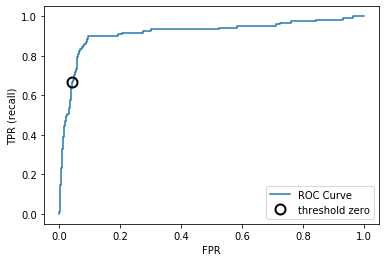

In [97]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,
                                svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# ゼロに最も近いしきい値を見つける
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

**Figure 5-15. ROC curve for SVM**

ROC曲線の場合、理想的な曲線は左上に近くなります。  
低い誤検出率(FPR)を維持しながら、高い再現率を生成する分類器が必要です。  
デフォルトのしきい値である0と比較すると、この曲線は、FPRをわずかに増加させるだけで、大幅に高いrecall（約0.9）を達成できることを示しています。  
左上に最も近いポイントは、デフォルトで選択されているポイントよりも優れた動作ポイントである可能性があります。  
繰り返しになりますが、しきい値の選択はテストセットではなく、別の検証セットで行う必要があることに注意してください。  

図5-16のROC曲線を使用して、ランダムフォレストとSVMの比較を見つけることができます。

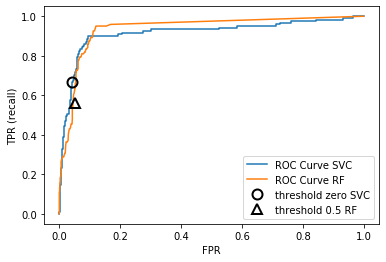

In [98]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,
                                          rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],
         tpr[close_default_rf],
         '^',
         markersize=10,
         label="threshold 0.5 RF",
         fillstyle="none",
         c='k',
         mew=2)

plt.legend(loc=4)

**Figure 5-16. Comparing ROC curves for SVM and random forest**

precision-recall曲線については、ROC曲線を単一の数値、つまり曲線の下の面積を使用して要約したいことがよくあります（これは一般に単にAUCと呼ばれ、問題の曲線はROC曲線であると理解されています。 ）  
roc_auc_score関数を使用して、ROC曲線の下の面積を計算できます。

In [99]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


AUCスコアを使用してランダムフォレストとSVMを比較すると、ランダムフォレストのパフォーマンスはSVMよりもかなり優れていることがわかります。 AUCは0から1までの曲線の下の領域であるため、AUCは常に0（最低）から1（最高）の間の値を返すことを思い出してください。  
データセット内のクラスがどれほど不均衡であっても、ランダムに予測すると、常に0.5のAUCが生成されます。  
これにより、AUCは、正答率(accuracy)よりも不均衡な分類問題に対してはるかに優れたメトリックになります。  
AUCは、陽性サンプルのランキングを評価するものとして解釈できます。  
これは、正のクラスからランダムに選択されたポイントが、負のクラスからランダムに選択されたポイントよりも分類子に従って高いスコアを持つ確率と同等です。  
したがって、完全なAUCが1の場合は、すべての正のポイントがすべての負のポイントよりも高いスコアを持つことを意味します。  
不均衡なクラスの分類問題の場合、モデル選択にAUCを使用する方が、精度を使用するよりもはるかに意味があることがよくあります。  

数字データセット内のすべてのnineを他のすべての数字に対して分類するという以前に調査した問題に戻りましょう。  
カーネル帯域幅(kernel bandwidth)の3つの異なる設定であるガンマを使用したSVMを使用して、データセットを分類します（図5-17を参照）。

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


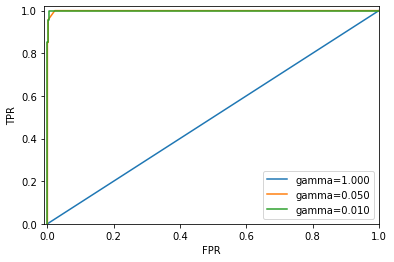

In [100]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

**Figure 5-17. Comparing ROC curves of SVMs with different settings of gamma**

gammaの3つの設定すべての正答率(accuracy)は同じで、90％です。これは偶然のパフォーマンスと同じかもしれませんし、そうでないかもしれません。  
ただし、AUCと対応する曲線を見ると、3つのモデルの間に明確な違いがあります。  
gamma = 1.0の場合、AUCは実際には偶然のレベルにあります。  
つまり、decision_functionの出力はランダムと同じくらい良好です。  
ガンマ= 0.05の場合、パフォーマンスはAUC0.9まで大幅に向上します。  
最後に、gamma = 0.01の場合、1.0の完全なAUCが得られます。  
つまり、決定関数に従って、すべての正のポイントがすべての負のポイントよりも上位にランク付けされます。  
言い換えれば、適切なしきい値を使用すると、このモデルはデータを完全に分類できます！$^5$  
これを知っていると、このモデルのしきい値を調整して、優れた予測を得ることができます。  
精度(accuracy)だけを使用していたら、これを発見することはできなかったでしょう。  

このため、不均衡なデータでモデルを評価する場合は、AUCを使用することを強くお勧めします。ただし、AUCはデフォルトのしきい値を使用しないため、AUCが高いモデルから有用な分類結果を取得するには、決定しきい値を調整する必要がある場合があることに注意してください。

#### 5.3.3 Metrics for Multiclass Classification(マルチクラス分類のメトリクス)

バイナリ分類タスクの評価について深く議論したところで、マルチクラス分類を評価するためのメトリクスに移りましょう。  
基本的に、マルチクラス分類のためのすべてのメトリクスは、バイナリ分類のメトリクスから派生したものですが、すべてのクラスで平均化されています。  
マルチクラス分類の精度は、再び正しく分類された例の割合として定義されます。  
繰り返しになりますが、クラスが不均衡な場合、精度はあまり良い評価指標ではありません。  
85%のポイントがクラスAに属し、10%がクラスBに属し、5%がクラスCに属している3クラス分類問題を想像してみてください。  
一般的に、多クラス分類の結果は、2値分類の結果よりも理解しにくいものです。  
正答率(accuracy)とは別に、共通のツールは、前のセクションでバイナリの場合に見た混乱行列と分類レポートです。  
これら2つの詳細な評価方法を、digitsデータセットの10種類の手書き数字を分類するタスクに適用してみましょう。

In [101]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy:{:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy:0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


モデルの精度は95.3％であり、これはすでにかなりうまくいっていることを示しています。  
混同行列は、もう少し詳細を提供します。  
バイナリの場合、各行はtrueのラベルに対応し、各列は予測されたラベルに対応します。  
図5-18に、視覚的により魅力的なプロットを示します。

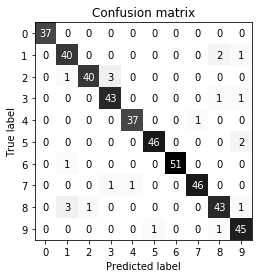

In [104]:
score_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

**Figure 5-18. Confusion matrix for the 10-digit classification task**

最初のクラスである数字0の場合、クラスには37のサンプルがあり、これらのサンプルはすべてクラス0として分類されました（クラス0の偽陰性はありません）。  
混同行列の最初の行の他のすべてのエントリが0であることがわかります。  
また、混同行列の最初の列の他のすべてのエントリが0であるため、他の数字が誤って0として分類されていないことがわかります（クラス0の誤検知はありません）。  
ただし、一部の数字は他の数字と混同されていました。  
たとえば、数字2（3行目）のうち3桁は数字3（4列目）に分類されていました。  
2に分類された1桁の3（3列目、4行目）と2に分類された1桁の8（3列目、9行目）もありました。  

Classification_report関数を使用すると、各クラスの適合率、再現率、およびf-scoreを計算できます。

In [105]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



当然のことながら、クラス0については、このクラスとの混同がないので、適合率とリコールは完全に1です。  
一方、クラス7については、他のクラスが7と誤って分類されなかったため、精度は1ですが、クラス6については、偽陰性がないため、リコールは1です。 また、クラス8とクラス3については、このモデルが特に困難であることがわかります。　　

マルチクラス設定で不均衡なデータセットのために最も一般的に使用されるメトリックは、マルチクラス版のfーscoreです。  
マルチクラスf-scoreの背後にある考え方は、クラスごとに1つのバイナリf-soreを計算し、そのクラスを正のクラスとし、他のクラスが負のクラスを構成します。  
そして、これらのクラスごとのf-scoreは、以下の戦略の1つを用いて平均化されます。　　
- 「macro(マクロ)」平均化は、重み付けされていないクラスごとのf-scoreを計算します。  
これにより、サイズに関係なく、すべてのクラスに等しい重みが与えられます。
- 「weighted(加重)」平均は、サポートによって加重された、クラスごとのf-scoreの平均を計算します。  
これは、分類レポートで報告されるものです。
- 「micro(マイクロ)」平均化は、すべてのクラスの偽陽性、偽陰性、および真陽性の総数を計算し、これらのカウントを使用して適合率、再現率、およびf-scoreを計算します。

各サンプルを同じように気にする場合は、「マイクロ」平均$f_1-score$を使用することをお勧めします。   
各クラスを同じように気にする場合は、「マクロ」平均$f_1-score$を使用することをお勧めします。

In [106]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


### 5.3.4 Regression Metrics(回帰指標)

回帰の評価は、分類の場合と同様に詳細に行うことができます。　　
たとえば、ターゲットの過大予測と過小予測を分析することによって実行できます。　　
ただし、これまで見てきたほとんどのアプリケーションでは、すべてのリグレッサーのスコア法で使用されるデフォルトの$R^2$を使用するだけで十分です。  
ビジネス上の意思決定は、平均二乗誤差(mean squared error)または平均絶対誤差(mean absolute error)に基づいて行われることがあります。  
これにより、これらのメトリックを使用してモデルを調整するインセンティブが得られる場合があります。  
ただし、一般的に、$R^2$は回帰モデルを評価するためのより直感的なメトリックであることがわかりました。

### 5.3.5 Using Evaluation Metrics in Model Selection(モデル選択での評価指標の使用)

多くの評価方法と、ground truthとモデルを考慮してそれらを適用する方法について詳しく説明しました。  
ただし、GridSearchCVまたはcross_val_scoreを使用したモデル選択では、AUCなどのメトリックを使用したいことがよくあります。  
幸いなことに、scikit-learnは、GridSearchCVとcross_val_scoreの両方で使用できるスコアリング引数を介して、これを実現するための非常に簡単な方法を提供します。  
使用する評価指標を説明する文字列を指定するだけです。  
たとえば、平均適合率(avarage precision)スコアを使用して、数字データセットの「nie vs rest」タスクでSVM分類器を評価するとします。スコアをデフォルト（正答率-accuracy-）から平均適合率(average precision)に変更するには、スコアリングパラメーターとして「average_precision」を指定します。

In [107]:
# 分類のデフォルトのスコアは正答率(accuracy)です
print("Default scoring:",
     cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring = "accuracy"を提供しても、結果は変わりません
explicit_accuracy = cross_val_score(SVC(),
                                    digits.data,
                                    digits.target,
                                    scoring="accuracy",
                                    cv=5)
print("Explicit accuracy:", explicit_accuracy)
ap = cross_val_score(SVC(), digits.data, digits.target == 9,
                    scoring="average_precision", cv=5)
print("Average precision", ap)

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy: [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
Average precision [0.97562403 0.9886322  1.         0.99853801 0.95015534]


cross_validateを使用すると、一度に複数のメトリックを計算することもできます。

In [110]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                    scoring=["accuracy", "average_precision", "recall_macro"],
                    return_train_score=True, cv=5)
display(pd.DataFrame(res))

fit_time  score_time  test_accuracy  train_accuracy  \
0  0.030830    0.014116       0.975000        0.994433   
1  0.027566    0.014870       0.991667        0.995825   
2  0.033519    0.017524       1.000000        0.995132   
3  0.029138    0.013885       0.994429        0.995828   
4  0.027401    0.013510       0.980501        0.996523   

   test_average_precision  train_average_precision  test_recall_macro  \
0                0.975624                 0.994997           0.887346   
1                0.988632                 0.996010           0.958333   
2                1.000000                 0.995317           1.000000   
3                0.998538                 0.995257           0.972222   
4                0.950155                 0.999257           0.902778   

   train_recall_macro  
0            0.972222  
1            0.982252  
2            0.978780  
3            0.982252  
4            0.985725

同様に、GridSearchCVで最適なパラメーターを選択するために使用されるメトリックを変更できます。

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# ポイントを説明するために、やや悪いグリッドを提供します。
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# 正答率(accracy)のデフォルトのスコアリングを使用する
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)):{:.3f}".format(
    grid.best_score_))
print("Test set average precision:{:.3f}".format(
    average_precision_score(y_test,
                            grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(
    # ここではgrid.scoreと同じです
    accuracy_score(y_test, grid.predict(X_test))))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)):0.976
Test set average precision:0.966
Test set accuracy: 0.973


In [120]:
# 代わりにAUCスコアリングを使用します。
grid = GridSearchCV(SVC(),
                    param_grid=param_grid,
                    scoring="average_precision")
grid.fit(X_train, y_train)
print("Grid-search with average precision")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (average precision):{:.3f}".format(
    grid.best_score_))
print("Test set avrage precision: {:.3f}".format(
    average_precision_score(y_test,
                            grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(
    # ここではgrid.scoreと同じ
    accuracy_score(y_test, grid.predict(X_test))))

Grid-search with average precision
Best parameters: {'gamma': 0.01}
Best cross-validation score (average precision):0.988
Test set avrage precision: 0.996
Test set accuracy: 0.896


accuracy(正答率)を使用する場合は、パラメーターgamma = 0.0001が選択され、平均適合率(average precision)を使用する場合は、gamma = 0.01が選択されます。  
相互検証スコアは、どちらの場合もテストセットスコアと一致しています。  
予想されるように、平均適合率を最適化することがわかったパラメーターは、平均精度の点でテストセットでより優れたパフォーマンスを示し、accuracy(正答率)を最適化することがわかったパラメーターは、accuracy(正答率)の観点からテストセットでより優れたパフォーマンスを示します。　　

分類のスコアリングパラメーターの最も重要な値は、accuracy（デフォルト）、ROC曲線の下の領域のroc_auc、precision-recall率曲線の下の領域のaverage_precision、（マクロ）平均適合率またはRecallのrecall_macroおよびprecision_macro、binary f1-scoreスコアおよびさまざまな加重バリアントのf1、f1_macro、およびf1_weighted。  
回帰の場合、最も一般的に使用される値は、$R^2$スコアのr2、平均二乗誤差のmean_squared_error、および平均絶対誤差のmean_absolute_errorです。  
サポートされている引数の完全なリストは、ドキュメントを参照するか、metrics.scorerモジュールで定義されているSCORERディクショナリを参照してください。

In [122]:
from sklearn.metrics.scorer import SCORERS
print("Available scores:\n{}".format(sorted(SCORERS.keys())))

Available scores:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## 5.4 Summary and Outlook

この章では、機械学習アルゴリズムの評価と改善の基礎となる、相互検証、グリッド検索、評価指標について説明しました。  
この章で説明するツールは、第2章と第3章で説明するアルゴリズムとともに、すべての機械学習の実践者にとって重要な役割を果たします。  

この章で私たちが繰り返し述べた2つの特定のポイントがあります。  
なぜなら、それらは新しい開業医によって見過ごされがちだからです。  
1つ目は、相互検証と関係があります。  
相互検証またはテストセットの使用により、将来実行される機械学習モデルを評価できます。  
ただし、テストセットまたは相互検証を使用してモデルを選択したり、モデルパラメータを選択したりすると、テストデータが「使い果たされ」、同じデータを使用してモデルの将来のパフォーマンスを評価すると、過度になります。  
楽観的な見積もり。  

したがって、モデル構築のためのトレーニングデータ、モデルとパラメーターの選択のための検証データ、およびモデル評価のためのテストデータへの分割に頼る必要があります。  
単純な分割の代わりに、これらの分割のそれぞれを相互検証に置き換えることができます。  
（前述のように）最も一般的に使用される形式は、評価のためのトレーニング/テスト分割であり、モデルとパラメーターの選択のためにトレーニングセットで相互検証を使用します。  

2番目のポイントは、モデルの選択とモデルの評価に使用される評価メトリックまたはスコアリング関数の重要性に関係しています。  
機械学習モデルの予測からビジネス上の意思決定を行う方法の理論は、この本の範囲をいくらか超えています$^6$。  

> 6: このトピックの詳細については、FosterProvostとTomFawcettの著書DataScience for Business（O’Reilly）を強くお勧めします。

ただし、機械学習タスクの最終目標が高精度のモデルを構築することである場合はめったにありません。  
モデルを評価および選択するために選択するメトリックが、モデルが実際に使用される目的の適切な代用であることを確認してください。  
実際には、分類の問題でクラスのバランスが取れていることはめったになく、偽陽性(false positives)と偽陰性(folse negatives)の結果が大きく異なることがよくあります。  
これらの結果が何であるかを理解し、それに応じて評価指標(eavalution metrics)を選択するようにしてください。  

これまでに説明したモデルの評価と選択の手法は、データサイエンティストのツールボックスで最も重要なツールです。  
この章で説明したグリッド検索(Grid search)と相互検証(cross-validation)は、単一の教師ありモデルにのみ適用できます。  
ただし、多くのモデルでは前処理が必要であり、第3章の顔認識の例のように、一部のアプリケーションでは、データの異なる表現を抽出すると便利な場合があることを以前に見てきました  
次の章では、このような複雑なアルゴリズムの連鎖に対して、グリッド検索やクロスバリデーションを利用することができる Pipeline クラスを紹介します。  